# Suicides in the world - Final project

Alina Eliovich 205947443 , Guy Montal 203319991



# introduction

In our project we will try to evaluate which feature has the most impact on the number of suicides.

# The Variables in the data are:

*	 country 
*	 year : from 1985 - 2016
*	 sex : male or female
*	 age : grouped age (15-24, 25-34, 35-54, 54-74, 75+)
*	 suicides_no : suicides count
*	 population : number of people who was residents in the country at this year
*	 suicides/100k pop : suicides count rescale
*	 country-year : country with year combine
*	 HDI for year : Human Development Index, the higher the better
*	 gdp_for_year : Gross Domestic Product
*	 gdp_per_capita : Gross Domestic Product rescale
*	 generation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Describe data set:

In [2]:
#read the data frame And adjust a pisky coulomn, The variable 'gdp_for_year' should have numeric data type,
#but in here this variable have an object data type, we could have removed it in the Feature Encoding section, 
#but we learned this cool trick, so we added this below.
s_data = pd.read_csv("Suicide cases 1985-2016.csv",thousands=',')

In [3]:
s_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [4]:
s_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

If you look closely, We can see an inconsistency with the variable 'gdp_for_year' that has leading and trailing whitespaces.
We clean this up using the lamba and strip() functions.

In [5]:
s_data.rename(columns=lambda x: x.strip(), inplace=True)
s_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

We also see that the columns country-year is just a combination of the Year and Country columns, therefore we'll remove it.
we also suspect that the column 'HDI for year' has some missing values, we'll check that too.

In [6]:
s_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

19,456 missing values out of 27,820 in total is way too much, we can't replace this amount from our sources, so we decide to remove it too.

In [7]:
s_data.drop(['HDI for year','country-year'],axis=1,inplace=True)

In [8]:
s_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


# Visualization of Data
We visualize data to uncover hidden patterns if any in the dataset

In order to start visualize our data and normallize for data mining, we will make a copy of our dataset for our convenience:

In [9]:
df = s_data.copy()

### Feature Encoding

Feature Encoding is important because We have to encode the values in such way that we can make numeric calculations on Object data type, it will also be crucial for our future classifier 

In [10]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}

gender_coder = {'female':0,'male':1}

df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)

In [11]:
s_df = df.groupby('age_encoder')[['suicides_no']].sum()


Text(0, 0.5, 'Number of Suicide')

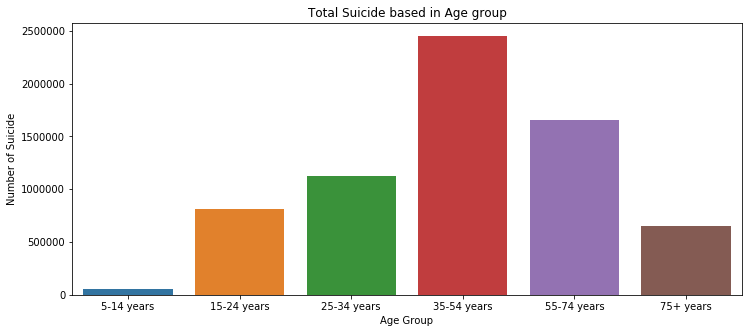

In [12]:
age = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
gender = {0:'female',1:'male'}

plt.figure(figsize=(12,5))
sns.barplot(x=s_df.index.map(age.get),y=s_df.suicides_no)
plt.title("Total Suicide based in Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

#### The most commot age to commit a suicide is between 35-54

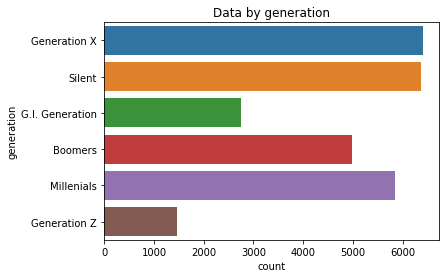

In [13]:
generation_coder = {'G.I. Generation':0,
               'Silent':1,
               'Boomers':2, 
               'Generation X':3,
               'Millenials':4,
               'Generation Z':5}

df['generation_encoder'] = df['generation'].map(generation_coder)

sns.countplot(y='generation', data=df)
plt.title('Data by generation')
plt.show()

#### Generation X and Silent generations are most common.

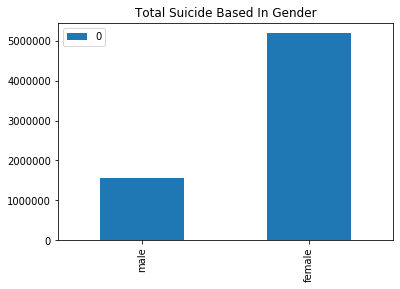

In [14]:
male_suicide = df[df.sex_encoder == 0]['suicides_no'].values.sum()
female_suicide = df[df.sex_encoder == 1]['suicides_no'].values.sum()

age_differance = pd.DataFrame([male_suicide,female_suicide],index=['male','female'])
age_differance.head()
age_differance.plot(kind='bar',title="Total Suicide Based In Gender")
plt.legend()


#### As we Can see more female commit suicide.

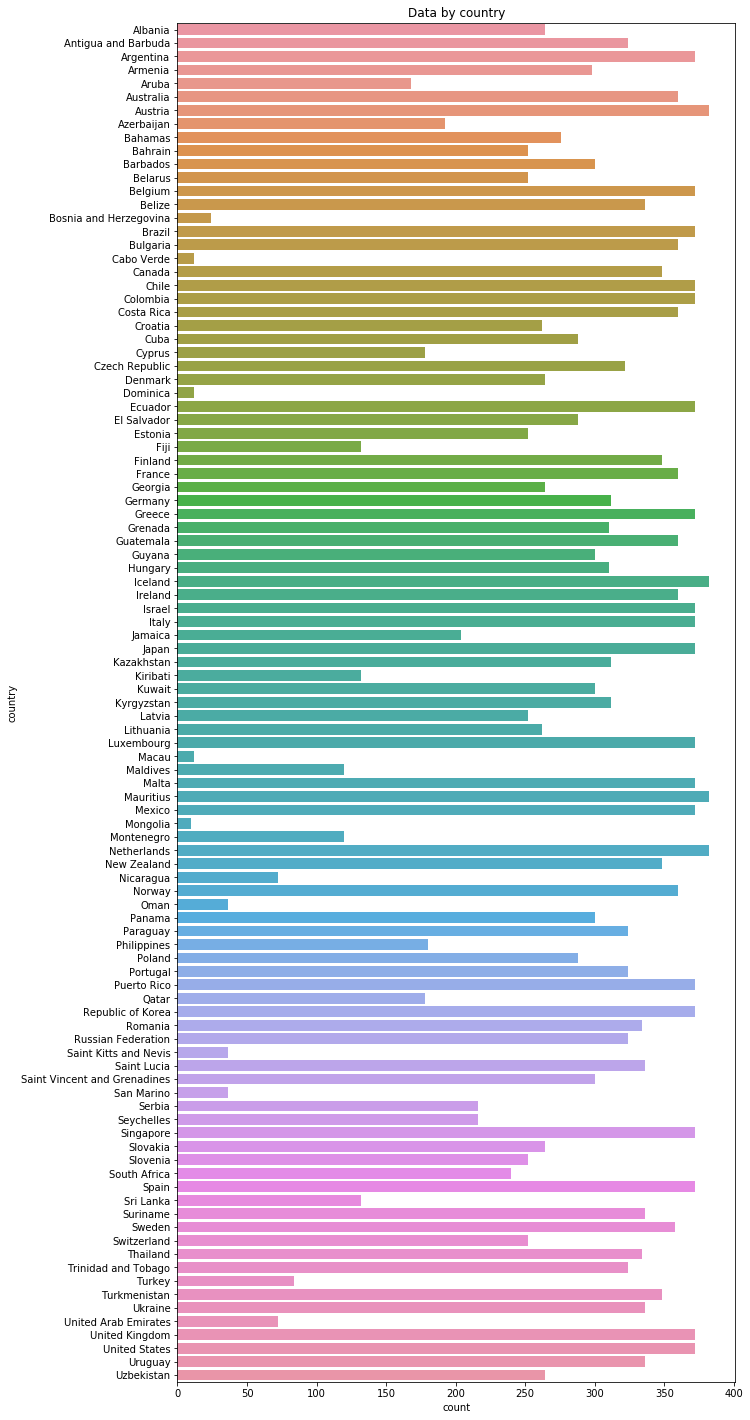

In [15]:
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df)
plt.title('Data by country')
plt.show()

In [16]:
country10=df.groupby('country')['suicides_no'].agg('sum').sort_values(ascending=False).head(10)
country10

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

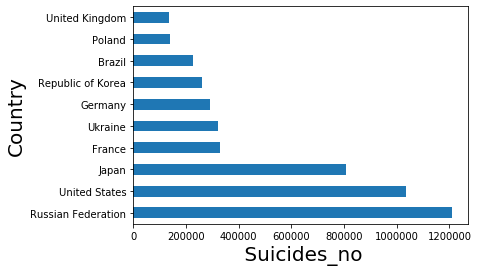

In [17]:
df.groupby(['country']).suicides_no.agg('sum').nlargest(10).plot(kind='barh')
plt.xlabel(' Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

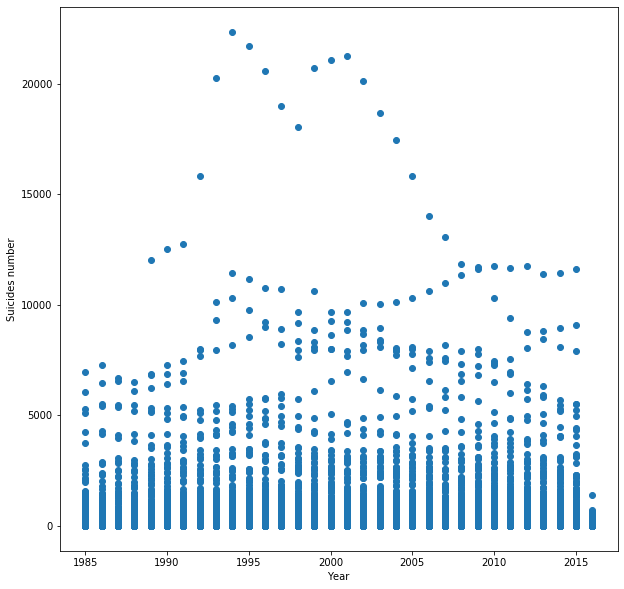

In [18]:
x = np.array(df.loc[:,'year']).reshape(-1,1)
y = np.array(df.loc[:,'suicides_no']).reshape(-1,1)
#Scatter Plot
plt.figure(figsize = [10,10])
plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Suicides number')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = s_data[s_data['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                     # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                       # R^2 calculation


female 5-14 years R^2 Score:  0.0027514788461395767
female 15-24 years R^2 Score:  0.0010113935186354395
female 25-34 years R^2 Score:  0.0008717617366276188
female 35-54 years R^2 Score:  1.86297878007613e-05
female 55-74 years R^2 Score:  0.001476129437632756
female 75+ years R^2 Score:  0.0008294550893717112
male 5-14 years R^2 Score:  0.0006614209006293725
male 15-24 years R^2 Score:  0.0005061509214493443
male 25-34 years R^2 Score:  0.0005698563302788395
male 35-54 years R^2 Score:  7.4959339088076504e-06
male 55-74 years R^2 Score:  7.665341106399826e-05
male 75+ years R^2 Score:  0.00029855482302010294


## Calculating the correlation matrix:

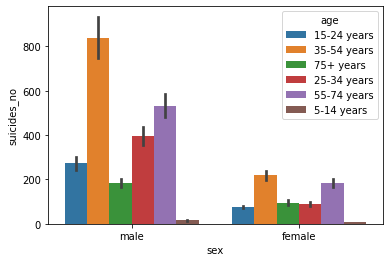

In [20]:
bar_age = sns.barplot(x='sex',y='suicides_no',hue='age',data=df)

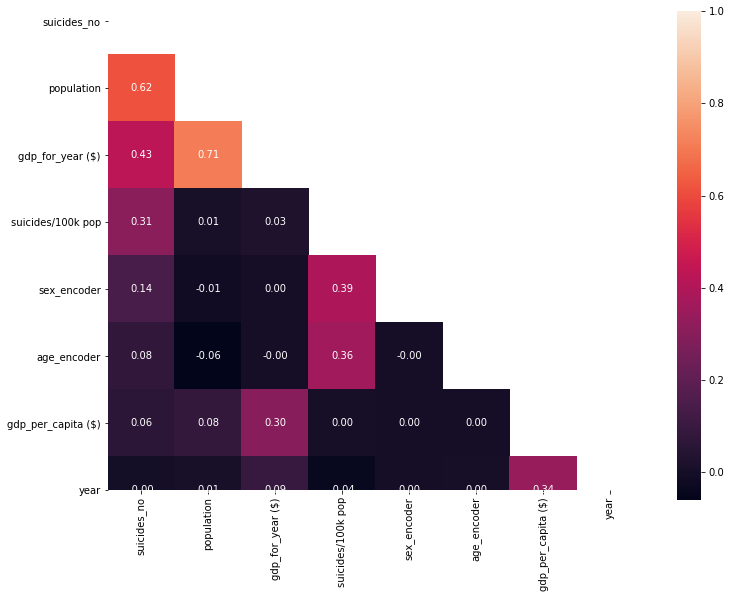

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'suicides_no')['suicides_no'].index
cm = np.corrcoef(df[cols].values.T)

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
mydata=df
mydata=mydata.drop(['country'],axis=1)#removed country column from 'mydata'
mydata=mydata.drop(['sex'],axis=1)
mydata=mydata.drop(['age'],axis=1)
mydata=mydata.drop(['generation'],axis=1)


In [23]:
import numpy as nump
mydata['suicides/100k_population']=(mydata.suicides_no/mydata.population)/100000
mydata['fatality_rate']=nump.where(mydata['suicides/100k_population']>mydata['suicides/100k_population'].mean(),0,1)

In [24]:
X = nump.array(mydata.drop(['fatality_rate', 'suicides/100k_population'], 1))
y=nump.array(mydata.fatality_rate)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print("Shape of x_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (20865, 9)
Shape of y_train:  (20865,)
Shape of x_test:  (6955, 9)
Shape of y_test:  (6955,)


In [25]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression : {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic Regression : 0.692


C:\Users\Aline\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
model.predict(X_test)

print('Decision Tree accuracy Score is:',accuracy_score(y_test,model.predict(X_test)))

Decision Tree accuracy Score is: 0.9998562185478074


In [27]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier(n_estimators=100,random_state=42)
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)
print("Random Forest accuracy Score is: ",accuracy_score(y_test,y_pred))

Random Forest accuracy Score is:  0.9998562185478074


In [28]:
from sklearn.metrics import classification_report
print(classification_report(logreg.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82      6955

    accuracy                           0.69      6955
   macro avg       0.50      0.35      0.41      6955
weighted avg       1.00      0.69      0.82      6955



C:\Users\Aline\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
